# Modelado de brote de COVID-19 en el ITESO

<span style="color:gray"> Proyecto Módulo 3 </span>
* Joaquín Uriel Ramírez
* Daniel Orozco

___
## Objetivo general
> #### Simular un brote de COVID-19 en el campus del ITESO con y sin distanciamiento social.

## Objetivos específicos
> * Encontrar un modelo con ecuaciones diferenciales que se ajuste a las características de un brote de COVID-19.
> * Identificar las restricciones del problema tales como la población del ITESO y la tasa de contagio con y sin distanciamiento social.
> * Resolver y simular los problemas de ecuaciones diferenciales.
> * Comparar resultados de ambas simulaciones.

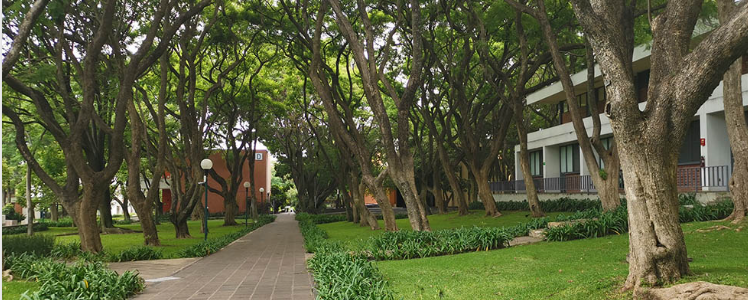

## Modelado del problema

#### Introducción
El COVID-19 es causado por el coronavirus humano SARS-COV-2. Como todos sabemos, causa enfermedad respiratoria superior que puede progresar a neumonía. A pesar de que fue detectado por primera vez en China a principios de 2019, el virus causó una pandemia que afectó al mundo entero desde marzo de 2020. Recientemente, con el desarrollo de biotecnología, distanciamiento social, entre otras acciones, se ha logrado controlar y hemos regresado a una vida similar a la pre pandémica. 

En los últimos meses se han relajado prácticamente todas las medidas de contención del virus, lo que puede llegar a ocasionar un brote en lugares como un campus universitario. En este proyecto se analizarán dos casos: primero, un brote sin medidas de distanciamiento social; después un brote con distanciamiento social. 

En la temporada navideña de 2020 y 2021 hubo brotes importantes y a pesar de que un porcentaje importante de la población está vacunada, lo cual puede ayudar a reducir la transmisión del virus, no podemos descartar la probabilidad de que haya un nuevo brote, que puede afectar al ITESO a principios del próximo semestre.


#### Modelo SEIR
El modelo SEIR es un modelo de ecuaciones diferenciales determinístico utilizado para la modelar y simular la transmición de enfermedades contagiosas. 
En el modelo, la población se divide en tres grupos no superpuestos que corresponden a cada fase de la enfermedad:
* Susceptible: En este caso toda la población está expuesta al virus. En el ITESO hay 13400 personas que entran cada día.
* Expuesta: Las personas que han sido expuesta al virus pero todavía no son infecciosas.
* Infeccioso: Las personas que se encuentran infectadas y pueden infectar a otras.
* Recuperado: Las personas que ya se hayan recuperado, se asume que no podrán contraer la enfermedad nuevamente en el semestre.

En este caso no usaremos tasa de mortalidad.

Propiedades clave del modelo SEIR:
* $\beta$ es la tasa constante asociada con la transmisión de la infección.
* $\gamma$ es la tasa de recuperación.
* La población infecciosa puede crecer solo si $\beta s > \gamma$. O sea si la tasa de infección es mayor a la tasa de recuperación.
* El ratio $R_0 = \frac{\beta}{\gamma}$ describe la "contagiosidad del virus".

Las tasas son modeladas de la siguiente manera:
* $\frac{\beta S I}{N}$ : es la tasa en la que la población susceptible encuentra a la población infectada, resultando en un contagio. $ S $ es el tamaño de la población susceptible. $\beta$ es el parámetro del modelo con unidad diaria.
* $\alpha E$ es la tasa en la cual la población que fue contagiada se convierte en infecciosa, donde $E$ es el tamaño de la población expuesta. 
* $\gamma I$ es la tasa en la cual la población infectada se recupera. $I$ es el tamaño de la población infecciosa.

El modelo trabaja con el siguiente sistema de ecuaciones diferenciales:

$$ \frac{ds}{dt} = -\beta s i $$
$$ \frac{de}{dt} = \beta s i - \alpha e$$
$$ \frac{di}{dt} = \alpha \epsilon - \gamma i $$
$$ \frac{dr}{dt} = \gamma i $$

## Simulación del problema

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Sin distanciamiento social

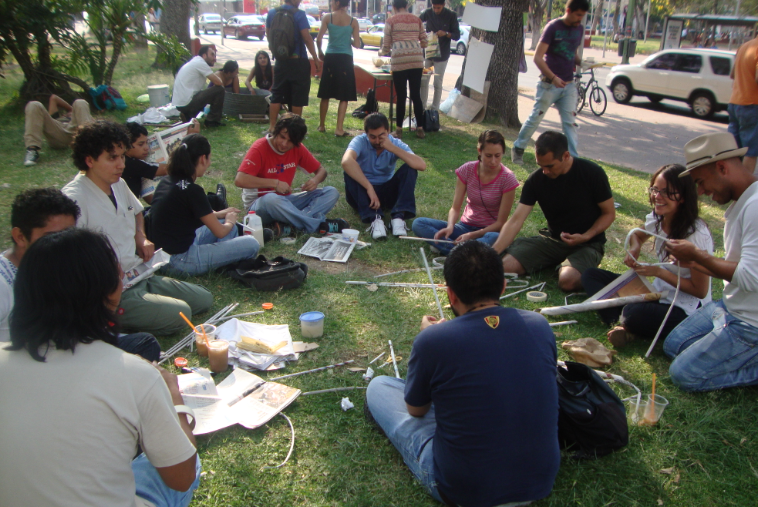

### Sin distanciamiento social

Los parámetros fueron elegidos con datos del estudio hecho por Boldog, et al. (2020):
* $\tau_{infección} = \frac{1}{\gamma} = 8.4$ días.
* $R_0 = \frac{\beta}{\gamma} = 4$

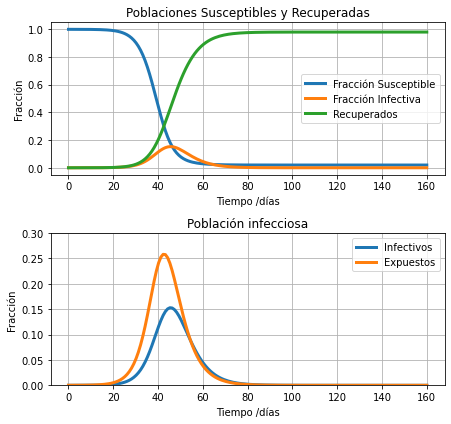

In [7]:
# Parámetros
R0 = 4
t_incubation = 5.1
t_infective = 3.3

# Número inicial de individuos infectados y recuperados
e_initial = 1/13400 
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

# Sistema de ecuaciones diferenciales del modelo SEIR
def deriv(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -beta * s * i
    dedt =  beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 160, 160)
x_initial = s_initial, e_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(alpha, beta, gamma))
s, e, i, r = soln.T

def plotdata(t, s, i, e=None):
    # Gráficas
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223)]

    ax[0].plot(t, s, lw=3, label='Fracción Susceptible')
    ax[0].plot(t, i, lw=3, label='Fracción Infectiva')
    ax[0].plot(t, r, lw=3, label='Recuperados')
    ax[0].set_title('Poblaciones Susceptibles y Recuperadas')
    ax[0].set_xlabel('Tiempo /días')
    ax[0].set_ylabel('Fracción')

    ax[1].plot(t, i, lw=3, label='Infectivos')
    ax[1].set_title('Población infecciosa')
    if e is not None: ax[1].plot(t, e, lw=3, label='Expuestos')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Tiempo /días')
    ax[1].set_ylabel('Fracción')

    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout()
    
plotdata(t, s, i, e)

## Con distanciamiento social

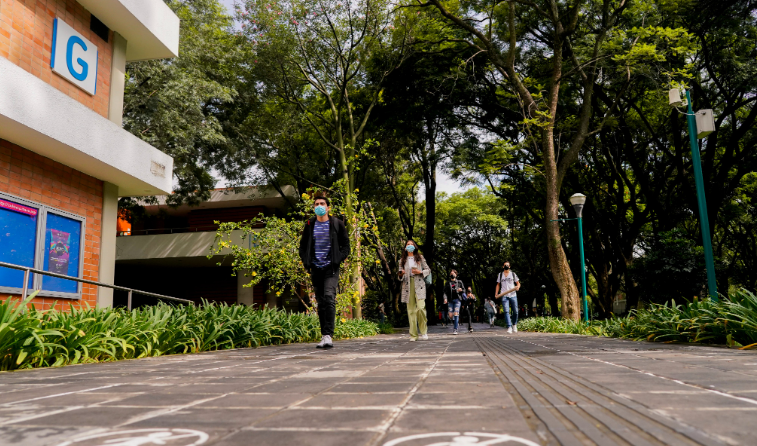

Con la vacuna, la contagiosidad es menor, por lo que el parámetro $R_0$ será menor que en el caso anterior.
* $R_0 = \frac{\beta}{\gamma} = 2.4$

Para propósitos del modelado de este caso, el parámetro $u$ será tomado en cuenta. Este representa la efectividad de las medidas de mitigación, donde $u=0$ representa medidas nulas, y $u=1$ representa aislación perfecta de individuos. En el caso actual del ITESO, pocos usan cubrebocas, la mayoría de clases son presenciales con salones llenos, todas las actividades tienen aforo máximo; pero un porcentaje significativo está vacunado, y quedaron algunos hábitos como uso de gel antibacterial y además se exige aislamiento de personas que sepan que están contagiadas. $u=0.2$ Parece ser prudente para la situación actual.

Así quedaría el sistema de ecuaciones diferenciales con el nuevo parámetro $u$:

$$ \frac{ds}{dt} = -(1-u)\beta s i $$
$$ \frac{de}{dt} = (1-u)\beta s i - \alpha e$$
$$ \frac{di}{dt} = \alpha \epsilon - \gamma i $$
$$ \frac{dr}{dt} = \gamma i $$

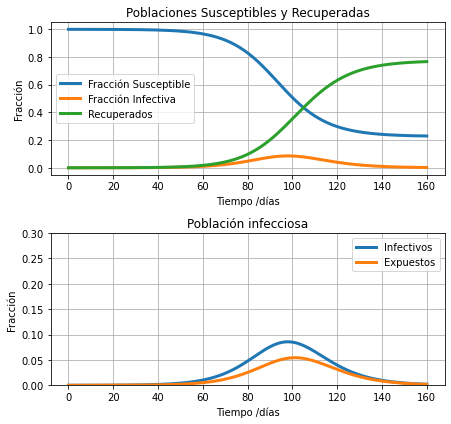

In [8]:
# Parámetros
u = 0.2
R0 = 2.4
t_incubation = 5.1
t_infective = 3.3

# Número inicial de individuos infectados y recuperados
e_initial = 1/13400
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

# Sistema de ecuaciones diferenciales del modelo SEIR
def deriv(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -(1-u)*beta * s * i
    dedt =  (1-u)*beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 160, 160)
x_initial = s_initial, e_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(alpha, beta, gamma))
s, e, i, r = soln.T

plotdata(t, s, e, i)

## Resultados


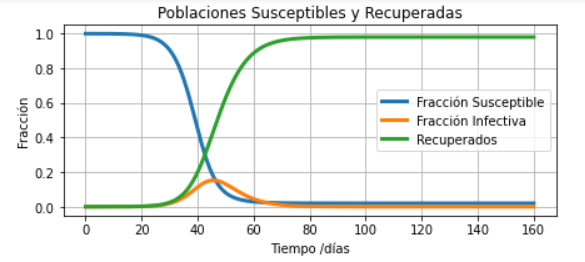, 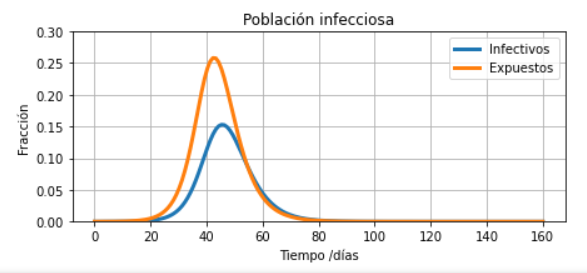
## COMPARACIÓN
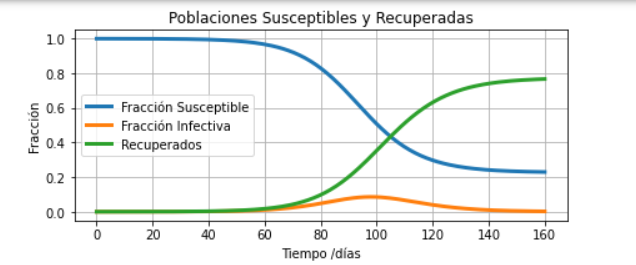, 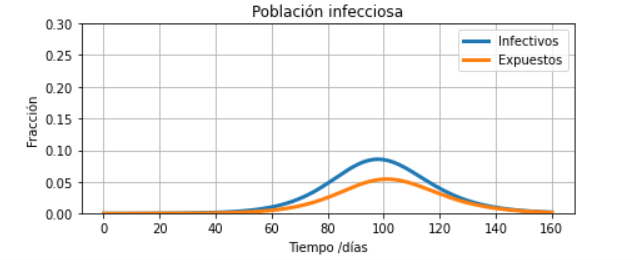

## Conclusiones

Comparando los resultados adquiridos en ambos escenarios es posible concluir que con una medida sanitaria abierta, es decir, sin distanciamiento social es más probable de terminar rápidamente con el riesgo de contagio a la población, pero esto conlleva un gran pico de contagios en un determinado momento, lo cual es muy riesgoso.


Por otro lado, si se utiliza una medida sanitaria conservadora en donde se proteja más en primera instancia a la población es posible llevar un cierto control sobre los contagios y que estos se vayan dando paulatinamente, a su vez esto trae consigo la consecuencia de tener latente por más tiempo la posibilidad de contagios. Reduce a la fracción de la población infectada en cualquier momento, lo que reduce la presión sobre los recursos de atención médica. Reduce el número de personas que finalmente experimentan la enfermedad. Para una enfermedad con una mortalidad distinta de cero, esto salva vidas.

___

## Referencias
* Keeling, Matt J., and Pejman Rohani. Modeling Infectious Diseases in Humans and Animals. Princeton University Press, 2008. JSTOR, www.jstor.org/stable/j.ctvcm4gk0. Accessed 24 Nov. 2022.
* Boldog, Péter, et al. "Risk Assessment of Novel Coronavirus COVID-19 Outbreaks Outside China." Journal of Clinical Medicine 9.2 (2020): 571. Accessed 24 Nov 2022. https://www.mdpi.com/2077-0383/9/2/571
* Bedford, Trevor. Cryptic transmission of novel coronavirus revealed by genomic epidemiology. Accessed 24 Nov 2022. https://bedford.io/blog/ncov-cryptic-transmission/